# Exploratory Data Analysis of Uber rides dataset

This dataset has information related to User rides between 2017 to 2022 in New York region. This includes information such as Ride Vendor, Payment options, Ride distance, start and end destination, bills etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
import sweetviz as sv
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 100)

## Different Datasets available

### Calendar CSV data

This dataset contains information related to days the year as seen in below subset.

In [2]:
col_names = pd.read_csv('./NYC_Taxi_Trips/454_calendar.csv', nrows=0).columns

types_dict = {'FiscalYear': 'int16',     
            'FiscalQuarter':'int8',
            'FiscalMonthNumber':'int8',
            'FiscalMonthOfQuarter':'int8',
            'FiscalWeekOfYear':'int8',
            'DayOfWeek':'int8',
            'FiscalQuarterYear':'int16',
            'DayOfMonthNumber':'int8',
            'DayName':'object'}
types_dict.update({col: str for col in col_names if col not in types_dict})
df_calendar = pd.read_csv('./NYC_Taxi_Trips/454_calendar.csv', dtype=types_dict)
df_calendar.head()

,Date,FiscalYear,FiscalQuarter,FiscalMonthNumber,FiscalMonthOfQuarter,FiscalWeekOfYear,DayOfWeek,FiscalMonthName,FiscalMonthYear,FiscalQuarterYear,DayOfMonthNumber,DayName
0,2017-02-05,2017,1,1,1,1,0,February,17-Feb,12017,5,Sunday
1,2017-02-06,2017,1,1,1,1,1,February,17-Feb,12017,6,Monday
2,2017-02-07,2017,1,1,1,1,2,February,17-Feb,12017,7,Tuesday
3,2017-02-08,2017,1,1,1,1,3,February,17-Feb,12017,8,Wednesday
4,2017-02-09,2017,1,1,1,1,4,February,17-Feb,12017,9,Thursday


In [3]:
df_calendar.describe()

,FiscalYear,FiscalQuarter,FiscalMonthNumber,FiscalMonthOfQuarter,FiscalWeekOfYear,DayOfWeek,FiscalQuarterYear,DayOfMonthNumber
count,1456.000000,1456.000000,1456.0000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2018.500000,2.500000,6.5000,2.000000,26.500000,3.000000,10634.500000,15.755495
std,1.118418,1.118418,3.4458,0.784734,15.013488,2.000687,20954.425323,8.781539
min,2017.000000,1.000000,1.0000,1.000000,1.000000,0.000000,-23519.000000,1.000000
25%,2017.750000,1.750000,3.7500,1.000000,13.750000,1.000000,19517.750000,8.000000
50%,2018.500000,2.500000,6.5000,2.000000,26.500000,3.000000,17018.500000,16.000000
75%,2019.250000,3.250000,9.2500,3.000000,39.250000,5.000000,24519.250000,23.000000
max,2020.000000,4.000000,12.0000,3.000000,52.000000,6.000000,32020.000000,31.000000


### Zones CSV data

This dataset contains categorization of different zone in New York city and has ID assigned to them

In [4]:
df_zones = pd.read_csv('./NYC_Taxi_Trips/taxi_zones.csv')
df_zones

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


### Data Dict

This explains all the fields that are present in datasets for rides and what different codes mean in them

In [5]:
df_data_dict = pd.read_csv('./NYC_Taxi_Trips/data_dictionary.csv', encoding='cp1252')
df_data_dict

,Field,Description
0,VendorID,"A code indicating the LPEP provider that provided the record (1= Creative Mobile Technologies, LLC; 2= Verifone Inc.)"
1,lpep_pickup_datetime,The date and time when the meter was engaged
2,lpep_dropoff_datetime,The date and time when the meter was disengaged
3,store_and_fwd_flag,"This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server (Y= store and forward trip; N= not a store and forward trip)"
4,RatecodeID,The final rate code in effect at the end of the trip (1= Standard rate; 2= JFK; 3= Newark; 4= Nassau or Westchester; 5= Negotiated fare; 6= Group ride)
5,PULocationID,TLC Taxi Zone in which the taximeter was engaged
6,DOLocationID,TLC Taxi Zone in which the taximeter was disengaged
7,passenger_count,The number of passengers in the vehicle (this is a driver entered value)
8,trip_distance,The elapsed trip distance in miles reported by the taximeter
9,fare_amount,The time-and-distance fare calculated by the meter


## Main rides DATASET

There are 4 different datasets containing uber rides in New York city region for year 2017-2022 respectively. We are going to import each dataset and concatinante them in order to create a masterdataset of 4 years

In [6]:
#Huge datasets imported with predefined column datatypes in order to reduce the size of df

col_names = pd.read_csv('./NYC_Taxi_Trips/taxi_trips/2017_taxi_trips.csv', nrows=0).columns

parse_dates = ['lpep_pickup_datetime', 'lpep_dropoff_datetime']
types_dict = {'VendorID': 'category',
'RatecodeID': 'category',     
'PULocationID':'int16',
'DOLocationID':'category',
'passenger_count':'category',
'trip_distance':'float16',
'fare_amount':'float16',
'extra':'float16',
'mta_tax':'float16',
'tip_amount':'float16',
'tolls_amount':'float16',
'improvement_surcharge':'float16',
'total_amount':'float16',
'payment_type':'category',
'trip_type':'category',
'congestion_surcharge':'float16'}
types_dict.update({col: str for col in col_names if col not in types_dict})
df_2017 = pd.read_csv('./NYC_Taxi_Trips/taxi_trips/2017_taxi_trips.csv', dtype=types_dict, parse_dates=parse_dates)
df_2017.store_and_fwd_flag = df_2017.store_and_fwd_flag.map({'Y':True, 'N':False})

In [7]:
df_2017.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,1,2017-01-01 09:00:01,2017-01-01 09:03:56,False,1,74,41,1,0.700195,5.0,0.0,0.5,0.0,0.0,0.300049,5.800781,2,1
1,1,2017-01-01 18:57:55,2017-01-01 19:01:16,False,1,42,41,1,0.700195,5.0,0.0,0.5,0.0,0.0,0.300049,5.800781,2,1
2,2,2017-01-02 06:55:47,2017-01-02 06:58:54,False,1,42,41,1,0.700195,5.0,0.0,0.5,0.0,0.0,0.300049,5.800781,2,1
3,2,2017-01-02 14:34:17,2017-01-02 14:39:29,False,1,74,41,1,0.700195,5.0,0.0,0.5,0.0,0.0,0.300049,5.800781,2,1
4,1,2017-01-03 06:12:30,2017-01-03 06:15:56,False,1,42,41,1,0.700195,5.0,0.0,0.5,0.0,0.0,0.300049,5.800781,2,1


In [8]:
df_2017.describe()

,PULocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.174067e+07,1.174067e+07,11740667.0,11740667.0,1.174067e+07,1.174067e+07,11740667.0,1.174067e+07,1.174067e+07
mean,1.118996e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.588120e+01,NaN,NaN,0.0,0.000000e+00,NaN,NaN,0.000000e+00,NaN
min,1.000000e+00,0.000000e+00,-480.0,-4.5,-5.000000e-01,-1.010000e+02,-80.0,-3.000488e-01,-4.800000e+02
25%,4.900000e+01,1.000000e+00,6.0,0.0,5.000000e-01,0.000000e+00,0.0,3.000488e-01,7.800781e+00
50%,8.200000e+01,1.750000e+00,9.0,0.5,5.000000e-01,0.000000e+00,0.0,3.000488e-01,1.114844e+01
75%,1.660000e+02,3.300781e+00,14.5,0.5,5.000000e-01,1.950195e+00,0.0,3.000488e-01,1.693750e+01
max,2.650000e+02,6.400000e+02,6004.0,30.0,8.300781e-01,4.495000e+02,8000.0,3.000488e-01,9.000000e+03


In [9]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740667 entries, 0 to 11740666
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     bool          
 4   RatecodeID             category      
 5   PULocationID           int16         
 6   DOLocationID           category      
 7   passenger_count        category      
 8   trip_distance          float16       
 9   fare_amount            float16       
 10  extra                  float16       
 11  mta_tax                float16       
 12  tip_amount             float16       
 13  tolls_amount           float16       
 14  improvement_surcharge  float16       
 15  total_amount           float16       
 16  payment_type           category      
 17  trip_type              category      
dtypes: bool(1), category

In [10]:
df_2018 = pd.read_csv('./NYC_Taxi_Trips/taxi_trips/2018_taxi_trips.csv', dtype=types_dict, parse_dates=parse_dates)
df_2018.store_and_fwd_flag = df_2018.store_and_fwd_flag.map({'Y':True, 'N':False})
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807303 entries, 0 to 8807302
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     bool          
 4   RatecodeID             category      
 5   PULocationID           int16         
 6   DOLocationID           category      
 7   passenger_count        category      
 8   trip_distance          float16       
 9   fare_amount            float16       
 10  extra                  float16       
 11  mta_tax                float16       
 12  tip_amount             float16       
 13  tolls_amount           float16       
 14  improvement_surcharge  float16       
 15  total_amount           float16       
 16  payment_type           category      
 17  trip_type              category      
dtypes: bool(1), category(6

In [11]:
df_2019 = pd.read_csv('./NYC_Taxi_Trips/taxi_trips/2019_taxi_trips.csv', dtype=types_dict, parse_dates=parse_dates)
df_2019.store_and_fwd_flag = df_2019.store_and_fwd_flag.map({'Y':True, 'N':False})
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044050 entries, 0 to 6044049
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     object        
 4   RatecodeID             category      
 5   PULocationID           int16         
 6   DOLocationID           category      
 7   passenger_count        category      
 8   trip_distance          float16       
 9   fare_amount            float16       
 10  extra                  float16       
 11  mta_tax                float16       
 12  tip_amount             float16       
 13  tolls_amount           float16       
 14  improvement_surcharge  float16       
 15  total_amount           float16       
 16  payment_type           category      
 17  trip_type              category      
 18  congestion_surcharge  

In [12]:
df_2020 = pd.read_csv('./NYC_Taxi_Trips/taxi_trips/2020_taxi_trips.csv', dtype=types_dict, parse_dates=parse_dates)
df_2020.store_and_fwd_flag = df_2020.store_and_fwd_flag.map({'Y':True, 'N':False})
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734051 entries, 0 to 1734050
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     object        
 4   RatecodeID             category      
 5   PULocationID           int16         
 6   DOLocationID           category      
 7   passenger_count        category      
 8   trip_distance          float16       
 9   fare_amount            float16       
 10  extra                  float16       
 11  mta_tax                float16       
 12  tip_amount             float16       
 13  tolls_amount           float16       
 14  improvement_surcharge  float16       
 15  total_amount           float16       
 16  payment_type           category      
 17  trip_type              category      
 18  congestion_surcharge  

Creating master dataset by concatinating 2017 to 2022 dataset and deleting individual datasets to freeup memory

In [13]:
df_rides = pd.concat([df_2017.reset_index(drop=True),df_2018.reset_index(drop=True),
                      df_2019.reset_index(drop=True),df_2020.reset_index(drop=True)], ignore_index= True)
df_rides.PULocationID = df_rides.PULocationID.astype('category')
df_rides.DOLocationID = df_rides.DOLocationID.astype('category')
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28326071 entries, 0 to 28326070
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     object        
 4   RatecodeID             category      
 5   PULocationID           category      
 6   DOLocationID           category      
 7   passenger_count        category      
 8   trip_distance          float16       
 9   fare_amount            float16       
 10  extra                  float16       
 11  mta_tax                float16       
 12  tip_amount             float16       
 13  tolls_amount           float16       
 14  improvement_surcharge  float16       
 15  total_amount           float16       
 16  payment_type           category      
 17  trip_type              category      
 18  congestion_surcharge

In [14]:
#Deleting other datasets to freeup memory

del df_2017
del df_2018
del df_2019
del df_2020

In [15]:
len(df_rides)

28326071

In [16]:
##Assigning null values as 0 in surcharge and removing infinite values in other data
df_rides['congestion_surcharge'] = df_rides['congestion_surcharge'].fillna(0)
df_rides = df_rides.replace([np.inf, -np.inf], np.nan)
df_rides = df_rides.dropna(how='any', axis = 0).reset_index(drop=True)

In [17]:
df_rides = df_rides[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       #'store_and_fwd_flag', 
       'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 
        #'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 
        #'improvement_surcharge', 
        'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge']]

In [18]:
df_rides.describe()

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge
count,2.738342e+07,27383416.0,2.738342e+07,27383416.0,2.738342e+07,27383416.00
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.00
min,-2.387500e+01,-890.0,-1.010000e+02,-80.0,-8.905000e+02,-2.75
25%,1.009766e+00,6.5,0.000000e+00,0.0,8.156250e+00,0.00
50%,1.799805e+00,9.5,0.000000e+00,0.0,1.143750e+01,0.00
75%,3.500000e+00,15.0,1.849609e+00,0.0,1.787500e+01,0.00
max,3.574400e+04,10448.0,6.410000e+02,8000.0,1.052800e+04,2.75


In [19]:
df_rides.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27383416 entries, 0 to 27383415
Data columns (total 15 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   VendorID               27383416 non-null  category      
 1   lpep_pickup_datetime   27383416 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  27383416 non-null  datetime64[ns]
 3   RatecodeID             27383416 non-null  category      
 4   PULocationID           27383416 non-null  category      
 5   DOLocationID           27383416 non-null  category      
 6   passenger_count        27383416 non-null  category      
 7   trip_distance          27383416 non-null  float16       
 8   fare_amount            27383416 non-null  float16       
 9   tip_amount             27383416 non-null  float16       
 10  tolls_amount           27383416 non-null  float16       
 11  total_amount           27383416 non-null  float16       
 12  payment_type

In [20]:
#filtering outliers
df_rides = df_rides.query('trip_distance >= 0 and trip_distance < 101 and fare_amount >= 0')
df_rides = df_rides[(df_rides['lpep_pickup_datetime'].dt.date>datetime.date(2016,12,30)) & 
                    (df_rides['lpep_pickup_datetime'].dt.date<datetime.date(2021,1,1))] 
df_zones['service_zone'] = df_zones['service_zone'].astype('category')

In [21]:
df_rides.describe()

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge
count,2.730998e+07,27309979.0,2.730998e+07,27309979.0,2.730998e+07,27309979.00
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,NaN,NaN,NaN,NaN,0.00
min,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.00
25%,1.019531e+00,6.5,0.000000e+00,0.0,8.156250e+00,0.00
50%,1.809570e+00,9.5,0.000000e+00,0.0,1.154688e+01,0.00
75%,3.509766e+00,15.0,1.860352e+00,0.0,1.790625e+01,0.00
max,1.007500e+02,8012.0,6.410000e+02,8000.0,9.000000e+03,2.75


In [22]:
np.asarray(df_rides.iloc[:,[8]], dtype=np.float64).mean()

12.712672735342114

### Merging Rides data with zones data

In [23]:
df_rides = df_rides.merge(df_zones[['LocationID', 'service_zone']], how='left', 
                           left_on='PULocationID',right_on='LocationID',
                            suffixes=('', '_PU'))
df_rides.rename(columns = {'LocationID':'PU_LocationID', 'service_zone':'PU_service_zone'}, inplace=True)

df_rides = df_rides.merge(df_zones[['LocationID', 'service_zone']], how='left', 
                           left_on='DOLocationID',right_on='LocationID',
                            suffixes=('', '_DO'))
df_rides.rename(columns = {'LocationID':'DO_LocationID', 'service_zone':'DO_service_zone'}, inplace=True)

In [24]:
df_rides = df_rides[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'RatecodeID', 
    #  'PULocationID', 'DOLocationID', 
        'passenger_count',
       'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       #'PU_LocationID', 
        'PU_service_zone', 
       #'DO_LocationID', 
        'DO_service_zone'
                    ]]


### Merging Rides data with Calendar data

In [25]:
df_rides['PU_dates'] = df_rides['lpep_pickup_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
# df_rides['DO_dates'] = df_rides['lpep_dropoff_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

df_rides = df_rides.merge(df_calendar, how='left', 
                           left_on='PU_dates',right_on='Date',
                            suffixes=('', '_PU'))

df_rides = df_rides.replace([np.inf, -np.inf], np.nan)

# df_rides= df_rides.dropna().reset_index(drop=True)

In [26]:
df_rides = df_rides.drop(columns=['DO_service_zone', 'Date'])

In [27]:
df_rides = df_rides.dropna().reset_index(drop=True)
df_rides['FiscalYear'] = df_rides['FiscalYear'].astype('int16')
df_rides['FiscalQuarter'] = df_rides['FiscalQuarter'].astype('int8')
df_rides['FiscalMonthNumber'] = df_rides['FiscalMonthNumber'].astype('int8')
df_rides['FiscalMonthOfQuarter'] = df_rides['FiscalMonthOfQuarter'].astype('int8')
df_rides['FiscalWeekOfYear'] = df_rides['FiscalWeekOfYear'].astype('int8')
df_rides['DayOfWeek'] = df_rides['DayOfWeek'].astype('int8')
df_rides['FiscalQuarterYear'] = df_rides['FiscalQuarterYear'].astype('int16')
df_rides['DayOfMonthNumber'] = df_rides['DayOfMonthNumber'].astype('int8')

In [28]:
df_rides.info(null_counts=True)

/var/folders/3t/lxlpbbqd3_5clmr1mqbxs6yc0000gn/T/ipykernel_1754/1674580984.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_rides.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26034742 entries, 0 to 26034741
Data columns (total 26 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   VendorID               26034742 non-null  category      
 1   lpep_pickup_datetime   26034742 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  26034742 non-null  datetime64[ns]
 3   RatecodeID             26034742 non-null  category      
 4   passenger_count        26034742 non-null  category      
 5   trip_distance          26034742 non-null  float16       
 6   fare_amount            26034742 non-null  float16       
 7   tip_amount             26034742 non-null  float16       
 8   tolls_amount           26034742 non-null  float16       
 9   total_amount           26034742 non-null  float16       
 10  payment_type           26034742 non-null  category      
 11  trip_type              26034742 non-null  category      
 12  congestion_s

In [29]:
df_rides.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type,congestion_surcharge,PU_service_zone,PU_dates,FiscalYear,FiscalQuarter,FiscalMonthNumber,FiscalMonthOfQuarter,FiscalWeekOfYear,DayOfWeek,FiscalMonthName,FiscalMonthYear,FiscalQuarterYear,DayOfMonthNumber,DayName
0,2,2017-06-29 08:41:02,2017-06-29 08:46:12,1,1,1.080078,6.0,0.0,0.0,6.800781,2,1,0.0,Boro Zone,2017-06-29,2017,2,5,2,21,4,June,17-Jun,22017,29,Thursday
1,2,2017-06-29 08:49:38,2017-06-29 08:54:44,1,1,1.040039,6.0,0.0,0.0,6.800781,2,1,0.0,Boro Zone,2017-06-29,2017,2,5,2,21,4,June,17-Jun,22017,29,Thursday
2,2,2017-06-29 08:20:21,2017-06-29 08:25:36,1,1,1.129883,6.0,0.0,0.0,6.800781,2,1,0.0,Boro Zone,2017-06-29,2017,2,5,2,21,4,June,17-Jun,22017,29,Thursday
3,1,2017-06-29 09:12:15,2017-06-29 09:17:35,1,1,1.000000,6.0,0.0,0.0,6.800781,2,1,0.0,Boro Zone,2017-06-29,2017,2,5,2,21,4,June,17-Jun,22017,29,Thursday
4,2,2017-06-29 12:00:08,2017-06-29 12:05:25,1,1,1.040039,6.0,0.0,0.0,6.800781,2,1,0.0,Boro Zone,2017-06-29,2017,2,5,2,21,4,June,17-Jun,22017,29,Thursday


### Analysis Start - Cleaning Done

In [30]:
df_rides.groupby('DayName')['total_amount'].agg('count').sort_values(ascending=False)

DayName
Saturday     4220876
Friday       4151320
Thursday     3776179
Wednesday    3613549
Sunday       3513757
Tuesday      3448508
Monday       3310553
Name: total_amount, dtype: int64

In [31]:
df_group = df_rides.groupby('DayName').agg({'total_amount' :[np.mean, np.sum], 'tip_amount' : [np.mean]},) \
                                    .rename(columns={'mean': 'Mean Amount', 'sum':'Total bills'})
df_group.columns = df_group.columns.map('-'.join)
df_group = df_group.reset_index()
df_group.sort_values('tip_amount-Mean Amount', ascending=False)

,DayName,total_amount-Mean Amount,total_amount-Total bills,tip_amount-Mean Amount
2,Saturday,14.903750,62906884.0,1.120933
3,Sunday,14.949881,52530248.0,1.116781
4,Thursday,15.549524,58717788.0,1.110060
6,Wednesday,15.483411,55950064.0,1.087167
0,Friday,15.372626,63816692.0,1.086173
5,Tuesday,15.428702,53206004.0,1.068641
1,Monday,15.237698,50445204.0,1.039901


<AxesSubplot:ylabel='FiscalQuarter'>

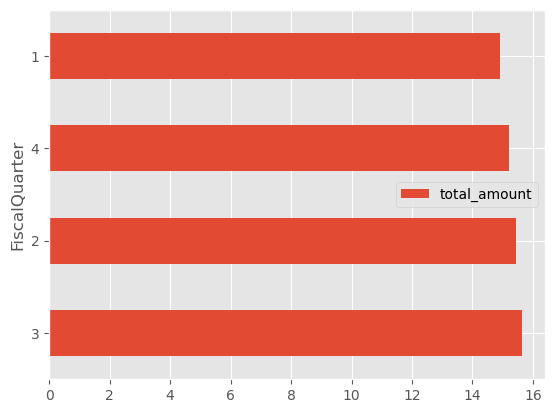

In [32]:
df_rides.groupby('FiscalQuarter').agg({'total_amount' :np.mean}).sort_values('total_amount', ascending=False).plot(kind='barh')

<AxesSubplot:xlabel='FiscalYear,FiscalQuarter'>

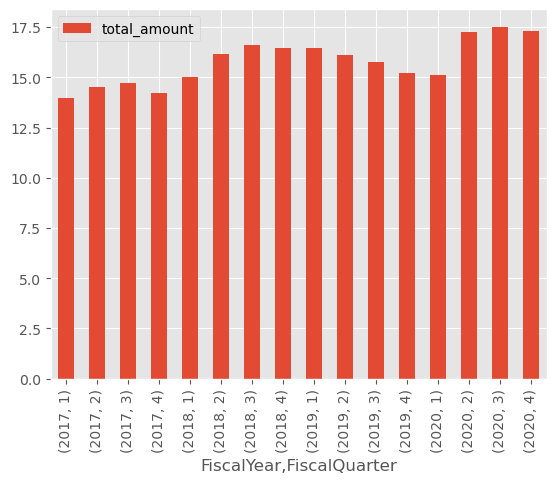

In [33]:
df_rides.groupby(['FiscalYear', 'FiscalQuarter']).agg({'total_amount' :np.mean}).sort_values(['FiscalYear', 'FiscalQuarter'], ascending=True).plot(kind='bar')

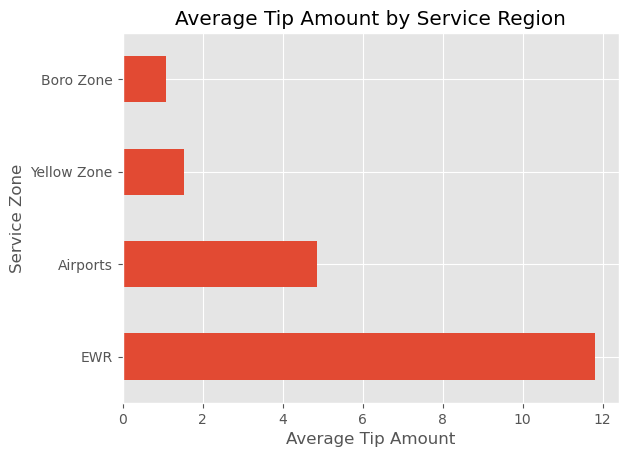

In [34]:
df_rides.groupby('PU_service_zone') \
                    .agg({'tip_amount' :np.mean}) \
                    .sort_values('tip_amount', ascending=False) \
                    .plot(kind='barh',title='Average Tip Amount by Service Region',
                         legend=False,
                         xlabel='Average Tip Amount',
                         ylabel='Service Zone')
plt.show()

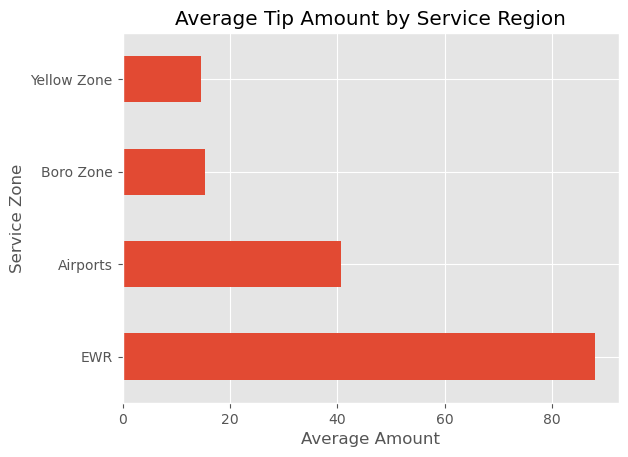

In [35]:
df_rides.groupby('PU_service_zone') \
                    .agg({'total_amount' :np.mean}) \
                    .sort_values('total_amount', ascending=False) \
                    .plot(kind='barh',title='Average Tip Amount by Service Region',
                         legend=False,
                         xlabel='Average Amount',
                         ylabel='Service Zone')
plt.show()

As we see the tip amount and total amount both follow similar pattern thus not giving any additional information. Thus let's try to make a stacked plot to see the proportion of tip in total.

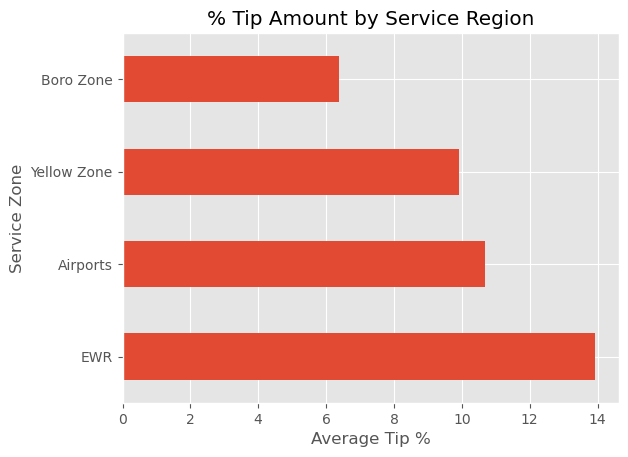

In [36]:
df_rides['tip_perc'] = (df_rides['tip_amount'] / df_rides['total_amount'])*100
df_rides.groupby('PU_service_zone') \
                    .agg({'tip_perc' :np.mean}) \
                    .sort_values('tip_perc', ascending=False) \
                    .plot(kind='barh',title='% Tip Amount by Service Region',
                         legend=False,
                         xlabel='Average Tip %',
                         ylabel='Service Zone')
plt.show()

In [37]:
df_rides.groupby('PU_service_zone')['total_amount'].agg('count').sort_values(ascending=False)

PU_service_zone
Boro Zone      25572037
Yellow Zone      453581
Airports           8658
EWR                 466
Name: total_amount, dtype: int64

We can see that Ride frquency and tip paid has an inverse correlation with each other

In [38]:
# df_rides.boxplot(column =['total_amount'], grid = True)
# plt.show()
# ax = df_rides.trip_distance.value_counts().plot(kind='hist', 
#                                            bins = 1,
#                                            title="Distance spread",
#                                            x='Ditance',
#                                            y='Count')